In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [0]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_test = x_train.reshape(*x_train.shape, 1), x_test.reshape(*x_test.shape, 1)
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

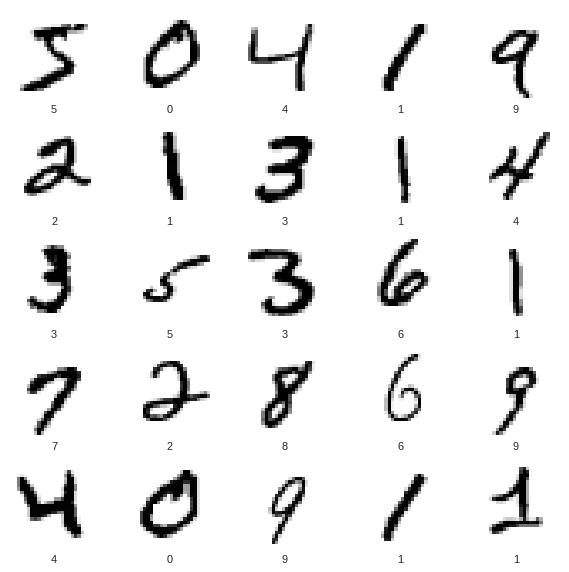

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(y_train[i].argmax())

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
__________

In [23]:
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 20s 326us/step - loss: 0.2727 - acc: 0.9120
Epoch 2/10
60000/60000 [==============================] - 19s 320us/step - loss: 0.0890 - acc: 0.9733
Epoch 3/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.0670 - acc: 0.9798
Epoch 4/10
60000/60000 [==============================] - 19s 319us/step - loss: 0.0541 - acc: 0.9840
Epoch 5/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.0470 - acc: 0.9861
Epoch 6/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.0420 - acc: 0.9874
Epoch 7/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.0384 - acc: 0.9884
Epoch 8/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.0345 - acc: 0.9891
Epoch 9/10
60000/60000 [==============================] - 19s 320us/step - loss: 0.0339 - acc: 0.9893
Epoch 10/10
60000/60000 [==============================] - 19s 319us/step - loss: 

In [27]:
loss, acc = model.evaluate(x_test, y_test, batch_size=32)
print("Accuracy: {}%".format(acc * 100))

10000/10000 [==============================] - 1s 97us/step
Accuracy: 99.38%


In [0]:
predictions = model.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)

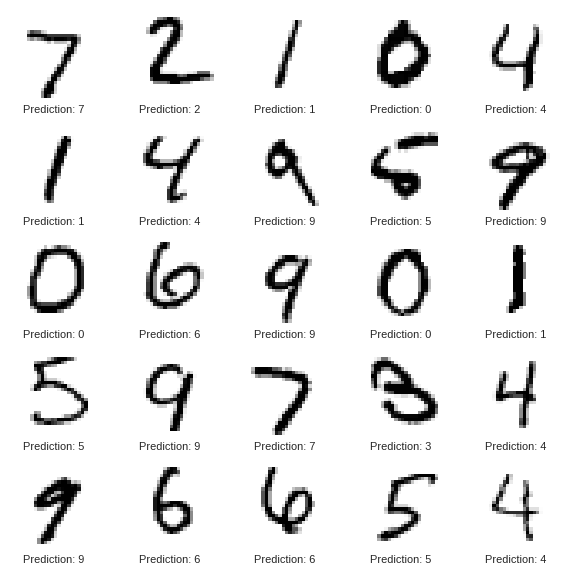

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel("Prediction: {}".format(np.argmax(predictions[i])))

In [0]:
def plot_confusion_matrix(cm, classes):
    cmap = plt.get_cmap('Reds')
    tick_marks = classes

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("Confusion matrix")
    plt.colorbar()
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(False)
    
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], '.2f'),
                     horizontalalignment='center',
                     color='white' if cm[i , j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

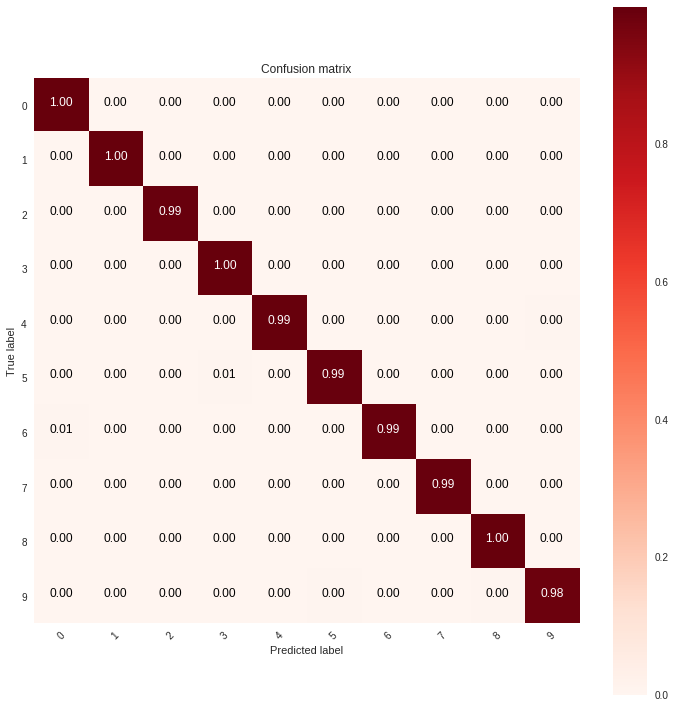

In [37]:
cm = confusion_matrix(np.argmax(y_test, axis=1), pred_labels)
classes = np.arange(predictions.shape[1])
plot_confusion_matrix(cm, classes)